In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_names = []
for i in range(3, 11):
    item = 'load_stimulus_exp{}.csv'.format(i)
    file_names.append(item)

folder_path = os.path.abspath(os.path.join("../datasets"))
load_stimulus_global = pd.DataFrame()

for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path)
    load_stimulus_global = pd.concat([load_stimulus_global, df], ignore_index=True)

# Save the combined DataFrame as a new CSV file
abs_path = os.path.join("..\\datasets", 'load_stimulus_global.csv')
load_stimulus_global.to_csv(abs_path, index=False)


In [3]:
current_dir = os.getcwd()

exp_ls = "load_stimulus_global.csv"
#exp_ls="load_stimulus_exp1.csv"
file_path = os.path.abspath(os.path.join("..\\datasets", exp_ls))

data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1662 entries, 0 to 207
Data columns (total 63 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   input_rate                          1662 non-null   float64
 1   output_rate                         1662 non-null   float64
 2   latency                             1662 non-null   float64
 3   flow_tracker_instructions           1662 non-null   float64
 4   nf_router_instructions              1662 non-null   float64
 5   ndpi_stats_instructions             1662 non-null   float64
 6   payload_scan_instructions           1662 non-null   float64
 7   bridge_instructions                 1662 non-null   float64
 8   flow_tracker_branches               1662 non-null   float64
 9   nf_router_branches                  1662 non-null   float64
 10  ndpi_stats_branches                 1662 non-null   float64
 11  payload_scan_branches               1662 non

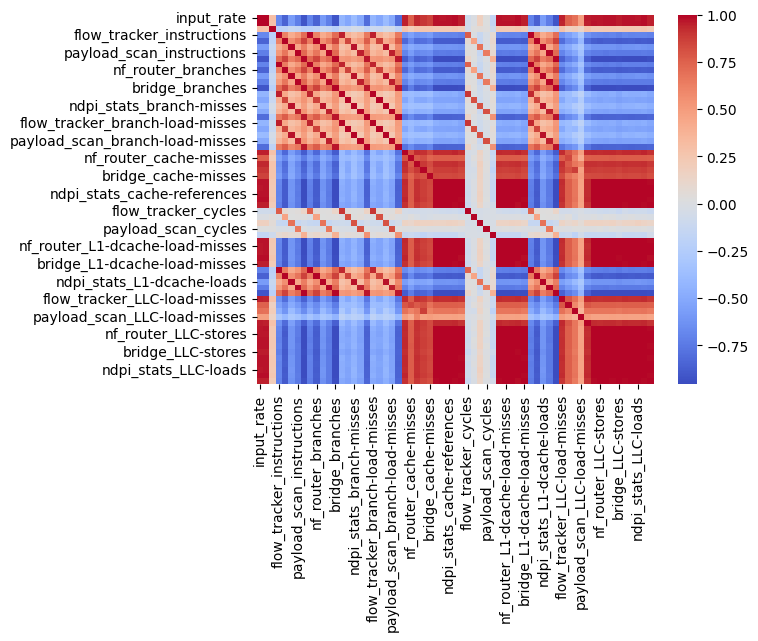

In [4]:
# heatmap
import seaborn as sns   
corr = data.corr()
plt.figure()
sns.heatmap(corr, cmap="coolwarm", annot=False, fmt=".2f")
plt.show()

In [6]:
# Reset the index starting from 0
data = data.reset_index(drop=True)
data

,input_rate,output_rate,latency,flow_tracker_instructions,nf_router_instructions,ndpi_stats_instructions,payload_scan_instructions,bridge_instructions,flow_tracker_branches,nf_router_branches,...,flow_tracker_LLC-stores,nf_router_LLC-stores,ndpi_stats_LLC-stores,payload_scan_LLC-stores,bridge_LLC-stores,flow_tracker_LLC-loads,nf_router_LLC-loads,ndpi_stats_LLC-loads,payload_scan_LLC-loads,bridge_LLC-loads
0,184.956628,183.017093,25.991,1.037270e+10,1.100358e+10,1.109050e+10,1.129255e+10,1.110242e+10,2.026474e+09,2.145019e+09,...,432882.0,1187278.0,411144.0,396848.0,856388.0,1043532.0,1596898.0,1257844.0,981158.0,1766648.0
1,517.102853,528.319057,12.672,9.807607e+09,1.101116e+10,1.101843e+10,1.092338e+10,1.110717e+10,1.914203e+09,2.158891e+09,...,436231.0,1192687.0,422881.0,396439.0,867070.0,1046231.0,1593752.0,1278065.0,988833.0,1768829.0
2,528.252899,528.300284,5.453,1.029055e+10,1.028421e+10,1.107497e+10,1.120433e+10,1.109601e+10,2.013210e+09,2.027344e+09,...,429844.0,1185122.0,419500.0,393803.0,854391.0,1034971.0,1593328.0,1271563.0,969735.0,1771058.0
3,528.281269,528.262879,12.035,1.022163e+10,1.101305e+10,1.100970e+10,1.113345e+10,1.110011e+10,2.003568e+09,2.170894e+09,...,429909.0,1191518.0,419629.0,394180.0,857864.0,1039429.0,1626552.0,1238004.0,992282.0,1810667.0
4,528.374269,528.357146,9.885,1.020038e+10,1.090671e+10,1.097442e+10,1.110801e+10,1.099739e+10,2.000374e+09,2.155497e+09,...,424803.0,1193583.0,410286.0,392936.0,854237.0,1043210.0,1576361.0,1219233.0,993850.0,1720734.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1657,528.283866,528.310672,9.562,1.031009e+10,1.093378e+10,1.110977e+10,1.122794e+10,1.110377e+10,2.016260e+09,2.159013e+09,...,436456.0,1169500.0,414855.0,397096.0,847314.0,1038939.0,1611844.0,1275439.0,995808.0,1827342.0
1658,528.362518,528.365257,5.737,9.628824e+09,1.081910e+10,1.099386e+10,1.122211e+10,1.110150e+10,1.849084e+09,2.142805e+09,...,430341.0,1174868.0,417959.0,391403.0,871231.0,1033653.0,1611079.0,1285356.0,985008.0,1809561.0
1659,528.318418,528.325632,8.102,1.038571e+10,1.084298e+10,1.101595e+10,1.131260e+10,1.109957e+10,2.004454e+09,2.146657e+09,...,437016.0,1188435.0,420926.0,396709.0,866713.0,1046060.0,1623921.0,1287205.0,991940.0,1797720.0
1660,528.322325,528.309485,12.099,1.038598e+10,1.094590e+10,1.111394e+10,1.130293e+10,1.109531e+10,2.017026e+09,2.161594e+09,...,437706.0,1188273.0,421399.0,394818.0,858138.0,1040744.0,1613979.0,1285546.0,981777.0,1768861.0


<Axes: >

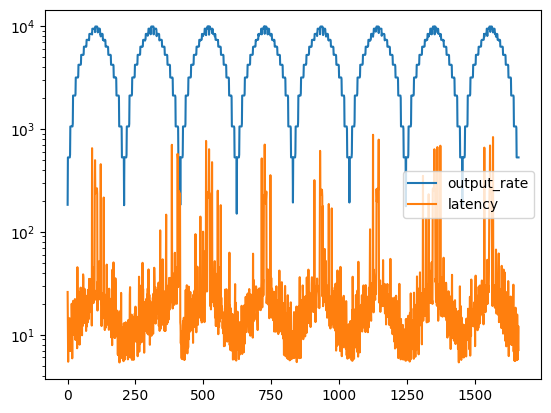

In [8]:
data.iloc[:, 1:3].plot(logy=True)

In [9]:
corr = data.corr()
correlation_list = []
for i in range(1,2):
    for j in range(len(corr.columns)):
        correlation_list.append((corr.columns[i], corr.columns[j], abs(corr.iloc[i, j])))


sorted_correlations = sorted(correlation_list, key=lambda x: x[2], reverse=True)

for correlation in sorted_correlations:
    print(f"Correlation between {correlation[0]} and {correlation[1]}: {correlation[2]:.2f}")

Correlation between output_rate and output_rate: 1.00
Correlation between output_rate and input_rate: 1.00
Correlation between output_rate and payload_scan_L1-dcache-load-misses: 0.98
Correlation between output_rate and payload_scan_LLC-loads: 0.98
Correlation between output_rate and payload_scan_cache-references: 0.98
Correlation between output_rate and flow_tracker_LLC-loads: 0.98
Correlation between output_rate and flow_tracker_L1-dcache-load-misses: 0.98
Correlation between output_rate and flow_tracker_cache-references: 0.98
Correlation between output_rate and payload_scan_LLC-stores: 0.97
Correlation between output_rate and nf_router_LLC-loads: 0.97
Correlation between output_rate and ndpi_stats_cache-references: 0.97
Correlation between output_rate and ndpi_stats_LLC-stores: 0.97
Correlation between output_rate and ndpi_stats_L1-dcache-load-misses: 0.97
Correlation between output_rate and nf_router_cache-references: 0.97
Correlation between output_rate and flow_tracker_LLC-stores

In [10]:
corr = data.corr()
correlation_list = []
for i in range(2,3):
    for j in range(len(corr.columns)):
        correlation_list.append((corr.columns[i], corr.columns[j], abs(corr.iloc[i, j])))


sorted_correlations = sorted(correlation_list, key=lambda x: x[2], reverse=True)

for correlation in sorted_correlations:
    print(f"Correlation between {correlation[0]} and {correlation[1]}: {correlation[2]:.2f}")

Correlation between latency and latency: 1.00
Correlation between latency and input_rate: 0.30
Correlation between latency and flow_tracker_LLC-load-misses: 0.29
Correlation between latency and bridge_LLC-load-misses: 0.28
Correlation between latency and output_rate: 0.28
Correlation between latency and flow_tracker_cache-misses: 0.28
Correlation between latency and ndpi_stats_cache-misses: 0.27
Correlation between latency and payload_scan_cache-misses: 0.26
Correlation between latency and bridge_cache-misses: 0.26
Correlation between latency and payload_scan_L1-dcache-load-misses: 0.25
Correlation between latency and payload_scan_LLC-loads: 0.25
Correlation between latency and payload_scan_cache-references: 0.25
Correlation between latency and flow_tracker_LLC-loads: 0.24
Correlation between latency and payload_scan_LLC-stores: 0.24
Correlation between latency and flow_tracker_L1-dcache-load-misses: 0.24
Correlation between latency and nf_router_LLC-loads: 0.24
Correlation between lat

# Resource stimulus

In [11]:
resouce_stimulus_global = pd.DataFrame()
file_names = []

for i in range(3, 8):
    for j in [1,3]:
        for k in range(1,5):
            item = 'resource_stimulus_exp-{}-{}-{}.csv'.format(i,j,k)
            file_names.append(item)
            
file_names_1 = []
for i in range(3, 8):
    for j in [1, 3]:
        item = 'resource_stimulus_exp-{}-{}.csv'.format(i,j)
        file_names_1.append(item)

file_names = file_names + file_names_1

print(file_names)
folder_path = os.path.abspath(os.path.join("../datasets"))
resource_stimulus_global = pd.DataFrame()

for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path)
    resource_stimulus_global = pd.concat([resource_stimulus_global, df], ignore_index=True)

# Save the combined DataFrame as a new CSV file
abs_path = os.path.join("..\\datasets", 'resource_stimulus_global.csv')
resource_stimulus_global.to_csv(abs_path, index=False)

['resource_stimulus_exp-3-1-1.csv', 'resource_stimulus_exp-3-1-2.csv', 'resource_stimulus_exp-3-1-3.csv', 'resource_stimulus_exp-3-1-4.csv', 'resource_stimulus_exp-3-3-1.csv', 'resource_stimulus_exp-3-3-2.csv', 'resource_stimulus_exp-3-3-3.csv', 'resource_stimulus_exp-3-3-4.csv', 'resource_stimulus_exp-4-1-1.csv', 'resource_stimulus_exp-4-1-2.csv', 'resource_stimulus_exp-4-1-3.csv', 'resource_stimulus_exp-4-1-4.csv', 'resource_stimulus_exp-4-3-1.csv', 'resource_stimulus_exp-4-3-2.csv', 'resource_stimulus_exp-4-3-3.csv', 'resource_stimulus_exp-4-3-4.csv', 'resource_stimulus_exp-5-1-1.csv', 'resource_stimulus_exp-5-1-2.csv', 'resource_stimulus_exp-5-1-3.csv', 'resource_stimulus_exp-5-1-4.csv', 'resource_stimulus_exp-5-3-1.csv', 'resource_stimulus_exp-5-3-2.csv', 'resource_stimulus_exp-5-3-3.csv', 'resource_stimulus_exp-5-3-4.csv', 'resource_stimulus_exp-6-1-1.csv', 'resource_stimulus_exp-6-1-2.csv', 'resource_stimulus_exp-6-1-3.csv', 'resource_stimulus_exp-6-1-4.csv', 'resource_stimulus_

In [12]:
current_dir = os.getcwd()

exp_rs = "resource_stimulus_global.csv"

file_path = os.path.abspath(os.path.join("..\\datasets", exp_rs))

data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2204 entries, 0 to 39
Data columns (total 63 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   input_rate                          2204 non-null   float64
 1   output_rate                         2204 non-null   float64
 2   latency                             2204 non-null   float64
 3   flow_tracker_instructions           2204 non-null   float64
 4   nf_router_instructions              2204 non-null   float64
 5   ndpi_stats_instructions             2204 non-null   float64
 6   payload_scan_instructions           2204 non-null   float64
 7   bridge_instructions                 2204 non-null   float64
 8   flow_tracker_branches               2204 non-null   float64
 9   nf_router_branches                  2204 non-null   float64
 10  ndpi_stats_branches                 2204 non-null   float64
 11  payload_scan_branches               2204 non-

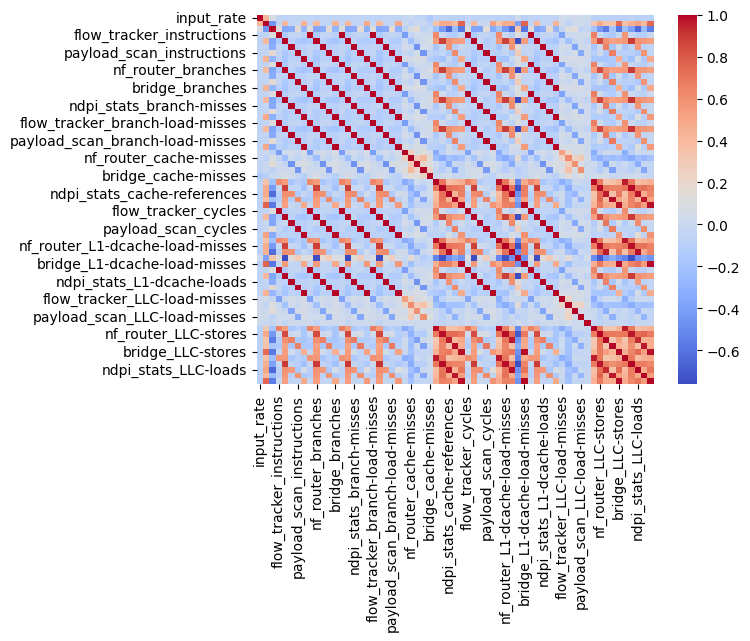

In [13]:
# heatmap
import seaborn as sns   
corr = data.corr()
plt.figure()
sns.heatmap(corr, cmap="coolwarm", annot=False, fmt=".2f")
plt.show()

In [14]:
# Reset the index starting from 0
data = data.reset_index(drop=True)
data

,input_rate,output_rate,latency,flow_tracker_instructions,nf_router_instructions,ndpi_stats_instructions,payload_scan_instructions,bridge_instructions,flow_tracker_branches,nf_router_branches,...,flow_tracker_LLC-stores,nf_router_LLC-stores,ndpi_stats_LLC-stores,payload_scan_LLC-stores,bridge_LLC-stores,flow_tracker_LLC-loads,nf_router_LLC-loads,ndpi_stats_LLC-loads,payload_scan_LLC-loads,bridge_LLC-loads
0,430.739428,395.699967,446.240,9.692082e+09,9.443573e+09,1.049316e+10,1.041645e+10,9.783568e+09,1.896827e+09,1.877849e+09,...,1621832.0,4396113.0,1651202.0,1548526.0,3490303.0,2851247.0,5351805.0,4517456.0,3342944.0,5209717.0
1,1931.062080,2108.060430,6.963,9.798601e+09,9.545770e+09,1.053986e+10,1.051738e+10,9.840193e+09,1.911193e+09,1.889315e+09,...,1588608.0,4306488.0,1649102.0,1552422.0,3598457.0,2824878.0,5454513.0,4506168.0,3249521.0,5444962.0
2,2113.287831,2108.357297,121.658,9.724074e+09,9.404633e+09,1.054339e+10,1.069055e+10,9.853661e+09,1.881369e+09,1.867273e+09,...,1759012.0,4701308.0,1738026.0,1600850.0,3855556.0,2957089.0,5917513.0,4709937.0,3488313.0,5806919.0
3,2113.051260,2110.185618,136.596,9.847614e+09,9.525907e+09,1.055504e+10,1.070286e+10,9.852107e+09,1.904211e+09,1.868400e+09,...,1761942.0,4709328.0,1735279.0,1608904.0,3847640.0,2918246.0,5826550.0,4722028.0,3489066.0,5864673.0
4,2113.025276,2109.777217,9.475,9.943245e+09,9.621745e+09,1.046509e+10,1.069309e+10,9.843422e+09,1.919456e+09,1.884183e+09,...,1768244.0,4737364.0,1712330.0,1605824.0,3822607.0,2954788.0,5922008.0,4714535.0,3515254.0,5832852.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2199,2113.043176,2111.057013,14.528,9.899203e+09,9.605406e+09,1.037312e+10,1.058848e+10,9.948546e+09,1.931402e+09,1.899771e+09,...,1725463.0,4568618.0,1610112.0,1591804.0,3124233.0,3194647.0,5722616.0,4207564.0,3291071.0,4846163.0
2200,2112.820345,2110.166323,7.879,9.758155e+09,9.688254e+09,1.037587e+10,1.044729e+10,9.952237e+09,1.911325e+09,1.879637e+09,...,1750640.0,4582072.0,1634603.0,1602543.0,3133540.0,3237373.0,5766765.0,4199775.0,3349360.0,4954356.0
2201,2113.057094,2110.166399,15.248,9.889150e+09,9.686687e+09,9.999630e+09,1.057448e+10,9.960664e+09,1.928945e+09,1.897540e+09,...,1762424.0,4515724.0,1605910.0,1613432.0,3121343.0,3148335.0,5793653.0,4136616.0,3266579.0,4861911.0
2202,2113.030251,2109.612654,15.590,9.841094e+09,9.729709e+09,1.034168e+10,1.052972e+10,9.947185e+09,1.904033e+09,1.905736e+09,...,1725871.0,4386785.0,1563440.0,1557442.0,2937449.0,3072530.0,5545311.0,3999610.0,3234155.0,4554417.0


<Axes: >

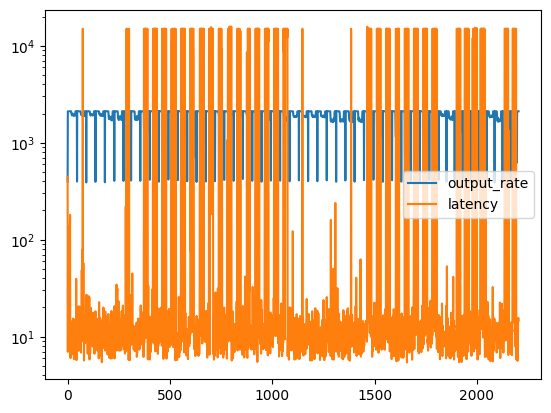

In [16]:
data.iloc[:, 1:3].plot(logy=True)

In [18]:
corr = data.corr()
correlation_list = []
for i in range(1,2):
    for j in range(i+1, len(corr.columns)):
        correlation_list.append((corr.columns[i], corr.columns[j], abs(corr.iloc[i, j])))


sorted_correlations = sorted(correlation_list, key=lambda x: x[2], reverse=True)

for correlation in sorted_correlations:
    print(f"Correlation between {correlation[0]} and {correlation[1]}: {correlation[2]:.2f}")

Correlation between output_rate and bridge_L1-dcache-load-misses: 0.77
Correlation between output_rate and bridge_cache-references: 0.76
Correlation between output_rate and bridge_LLC-loads: 0.76
Correlation between output_rate and bridge_LLC-stores: 0.74
Correlation between output_rate and bridge_cycles: 0.52
Correlation between output_rate and ndpi_stats_LLC-loads: 0.51
Correlation between output_rate and bridge_branch-misses: 0.49
Correlation between output_rate and bridge_branch-load-misses: 0.49
Correlation between output_rate and nf_router_LLC-stores: 0.49
Correlation between output_rate and nf_router_cache-references: 0.48
Correlation between output_rate and ndpi_stats_cache-references: 0.47
Correlation between output_rate and nf_router_L1-dcache-load-misses: 0.47
Correlation between output_rate and ndpi_stats_L1-dcache-load-misses: 0.46
Correlation between output_rate and latency: 0.46
Correlation between output_rate and nf_router_LLC-loads: 0.45
Correlation between output_rate